# ACRO Tests

In [1]:
import os

import numpy as np
import pandas as pd

In [2]:
# uncomment this line if acro is not installed
# ie you are in development mode
# sys.path.insert(0, os.path.abspath(".."))

In [3]:
from acro import ACRO, add_constant, utils

### Instantiate ACRO

In [4]:
acro = ACRO(suppress=False)

INFO:acro:version: 0.4.8
INFO:acro:config: {'safe_threshold': 10, 'safe_dof_threshold': 10, 'safe_nk_n': 2, 'safe_nk_k': 0.9, 'safe_pratio_p': 0.1, 'check_missing_values': False, 'survival_safe_threshold': 10, 'zeros_are_disclosive': True}
INFO:acro:automatic suppression: False


### Load test data

In [5]:
path = os.path.join("../data", "test_data.dta")
df = pd.read_stata(path)
df.head()

,charity,grant_type,index,year,inc_activity,inc_grants,inc_donations,inc_other,inc_total,total_costs,...,sh_staff_grants_given,sh_assets_grants_given,sh_income_balance,sh_staff_balance,sh_assets_balance,sh_income_assets,sh_staff_assets,sh_income_staff_costs,sh_assets_staff_costs,wgt
0,4Children,R,1.0,2011,2880902.0,9603182.0,91404.0,310947.0,12886435.0,12127472.0,...,NaN,NaN,0.072636,0.135971,0.767809,0.094602,0.177090,0.534203,5.646843,1.0
1,4Children,R,1.0,2014,6810520.0,18768904.0,58002.0,401879.0,26039304.0,25493796.0,...,NaN,NaN,0.057641,0.089150,1.001396,0.057560,0.089026,0.646561,11.232729,1.0
2,4Children,R,1.0,2015,7199403.0,21638036.0,132191.0,512654.0,29482284.0,32290108.0,...,NaN,NaN,-0.049619,-0.079828,-0.620210,0.080004,0.128711,0.621583,7.769365,1.0
3,4Children,R,1.0,2013,5573013.0,15194731.0,228844.0,267156.0,21263744.0,20989048.0,...,NaN,NaN,0.045740,0.068251,1.008259,0.045365,0.067692,0.670166,14.772749,1.0
4,4Children,R,1.0,2010,2056816.0,7335103.0,110256.0,424628.0,9926803.0,9769816.0,...,NaN,NaN,0.057696,0.122532,0.567539,0.101660,0.215901,0.470862,4.631749,1.0


### Pandas crosstab

In [6]:
table = pd.crosstab(df.year, [df.survivor, df.grant_type])
table

survivor   Dead in 2015     Alive in 2015            
grant_type            G   R             G   N   R R/G
year                                                 
2010                  3  47            12  59  24   8
2011                  3  47            12  59  24   8
2012                  3  47            12  59  24   8
2013                  3  47            12  59  24   8
2014                  3  47            12  59  24   8
2015                  3  47            12  59  24   8

### ACRO crosstab

In [7]:
safe_table = acro.crosstab(df.year, [df.survivor, df.grant_type])
safe_table

INFO:acro:get_summary(): fail; threshold: 12 cells may need suppressing; 
INFO:acro:outcome_df:
----------------------------------------------------------------|
survivor   |Dead_in_2015     |Alive_in_2015                     |
grant_type |G            R   |G             N   R   R/G         |
year       |                 |                                  |
----------------------------------------------------------------|
2010       | threshold;   ok | ok            ok  ok  threshold; |
2011       | threshold;   ok | ok            ok  ok  threshold; |
2012       | threshold;   ok | ok            ok  ok  threshold; |
2013       | threshold;   ok | ok            ok  ok  threshold; |
2014       | threshold;   ok | ok            ok  ok  threshold; |
2015       | threshold;   ok | ok            ok  ok  threshold; |
----------------------------------------------------------------|

INFO:acro:records:add(): output_0


survivor   Dead in 2015     Alive in 2015            
grant_type            G   R             G   N   R R/G
year                                                 
2010                  3  47            12  59  24   8
2011                  3  47            12  59  24   8
2012                  3  47            12  59  24   8
2013                  3  47            12  59  24   8
2014                  3  47            12  59  24   8
2015                  3  47            12  59  24   8

### same table with column hierarchy reversed to make sure spaces in variable name. dealt with properly

In [8]:
safe_table = acro.crosstab(df.year, [df.grant_type, df.survivor])
safe_table

INFO:acro:get_summary(): fail; threshold: 12 cells may need suppressing; 
INFO:acro:outcome_df:
------------------------------------------------------------------------------------------------|
grant_type |G                          |N             |R                          |R/G          |
survivor   |Dead_in_2015 Alive_in_2015 |Alive_in_2015 |Dead_in_2015 Alive_in_2015 |Alive_in_2015|
year       |                           |              |                           |             |
------------------------------------------------------------------------------------------------|
2010       | threshold;   ok           | ok           | ok           ok           | threshold;  |
2011       | threshold;   ok           | ok           | ok           ok           | threshold;  |
2012       | threshold;   ok           | ok           | ok           ok           | threshold;  |
2013       | threshold;   ok           | ok           | ok           ok           | threshold;  |
2014       | threshold

grant_type            G                           N            R  \
survivor   Dead in 2015 Alive in 2015 Alive in 2015 Dead in 2015   
year                                                               
2010                  3            12            59           47   
2011                  3            12            59           47   
2012                  3            12            59           47   
2013                  3            12            59           47   
2014                  3            12            59           47   
2015                  3            12            59           47   

grant_type                         R/G  
survivor   Alive in 2015 Alive in 2015  
year                                    
2010                  24             8  
2011                  24             8  
2012                  24             8  
2013                  24             8  
2014                  24             8  
2015                  24             8

### checking for testing purposes

In [9]:
mydata = df[(df["charity"].str[0] == "W")]
mydata = mydata[mydata["year"] < 2012]
acro.crosstab(mydata.year, mydata.survivor)

INFO:acro:get_summary(): fail; threshold: 4 cells may need suppressing; 
INFO:acro:outcome_df:
-------------------------------------|
survivor |Dead_in_2015 |Alive_in_2015|
year     |             |             |
-------------------------------------|
2010     | threshold;  | threshold;  |
2011     | threshold;  | threshold;  |
-------------------------------------|

INFO:acro:records:add(): output_2


survivor,Dead in 2015,Alive in 2015
year,,
2010,2,2
2011,2,2


### ACRO crosstab with suppression

In [10]:
acro.suppress = True

safe_table = acro.crosstab(df.year, df.grant_type, values=df.inc_grants, aggfunc="mean")
safe_table

INFO:acro:get_summary(): fail; threshold: 7 cells suppressed; p-ratio: 2 cells suppressed; nk-rule: 1 cells suppressed; 
INFO:acro:outcome_df:
---------------------------------------------------------------------------|
grant_type |G   |N                     |R   |R/G                           |
year       |    |                      |    |                              |
---------------------------------------------------------------------------|
2010       | ok | threshold; p-ratio;  | ok | threshold; p-ratio; nk-rule; |
2011       | ok |                   ok | ok |                   threshold; |
2012       | ok |                   ok | ok |                   threshold; |
2013       | ok |                   ok | ok |                   threshold; |
2014       | ok |                   ok | ok |                   threshold; |
2015       | ok |                   ok | ok |                   threshold; |
---------------------------------------------------------------------------|

INFO:acro

grant_type,G,N,R,R/G
year,,,,
2010,9921906.0,NaN,8402284.0,NaN
2011,8502246.0,124013.859375,7716880.0,NaN
2012,11458580.0,131859.062500,6958050.5,NaN
2013,13557147.0,147937.796875,7202273.5,NaN
2014,13748147.0,133198.250000,8277525.0,NaN
2015,11133433.0,146572.187500,10812888.0,NaN


### ACRO crosstab with suppression and totals

In [11]:
acro.suppress = False
table = acro.crosstab(
    df.year,
    [df.grant_type, df.survivor],
    values=df.inc_grants,
    aggfunc="count",
    margins=True,
)
print(table)

INFO:acro:Empty columns: ('N', 'Dead in 2015'), ('R/G', 'Dead in 2015') were deleted.
INFO:acro:get_summary(): fail; threshold: 14 cells may need suppressing; p-ratio: 8 cells may need suppressing; nk-rule: 7 cells may need suppressing; 
INFO:acro:outcome_df:
------------------------------------------------------------------------------------------------------------------------------------------------|
grant_type |G                                            |N                     |R                          |R/G                            |All|
survivor   |Dead_in_2015                   Alive_in_2015 |Alive_in_2015         |Dead_in_2015 Alive_in_2015 |Alive_in_2015                  |   |
year       |                                             |                      |                           |                               |   |
------------------------------------------------------------------------------------------------------------------------------------------------|
2010      

grant_type            G                           N            R  \
survivor   Dead in 2015 Alive in 2015 Alive in 2015 Dead in 2015   
year                                                               
2010                  2            12             5           40   
2011                  3            12            58           45   
2012                  3            12            59           45   
2013                  3            12            59           47   
2014                  3            12            59           43   
2015                  3             9            58           28   
All                  17            69           298          248   

grant_type                         R/G  All  
survivor   Alive in 2015 Alive in 2015       
year                                         
2010                  20             4   83  
2011                  24             8  150  
2012                  24             8  151  
2013                  24             8  153

In [12]:
acro.suppress = False

### ACRO crosstab with aggregation function

In [13]:
safe_table = acro.crosstab(df.year, df.survivor, values=df.inc_grants, aggfunc="mean")
safe_table

INFO:acro:get_summary(): pass
INFO:acro:outcome_df:
-------------------------------------|
survivor |Dead_in_2015 |Alive_in_2015|
year     |             |             |
-------------------------------------|
2010     | ok          | ok          |
2011     | ok          | ok          |
2012     | ok          | ok          |
2013     | ok          | ok          |
2014     | ok          | ok          |
2015     | ok          | ok          |
-------------------------------------|

INFO:acro:records:add(): output_5


survivor,Dead in 2015,Alive in 2015
year,,
2010,1320337.750,15466672.0
2011,1295468.000,7190086.5
2012,1270522.125,7119017.5
2013,1325315.500,7682584.0
2014,1282249.625,8276287.5
2015,1608412.250,8060488.5


### ACRO crosstab with multiple aggregation functions and totals

In [14]:
safe_table = acro.crosstab(
    df.year, df.grant_type, values=df.inc_grants, aggfunc=["mean", "std"], margins=True
)
safe_table

INFO:acro:get_summary(): fail; threshold: 14 cells may need suppressing; p-ratio: 4 cells may need suppressing; nk-rule: 2 cells may need suppressing; 
INFO:acro:outcome_df:
----------------------------------------------------------------------------------------------------------------------------------------------|
           mean                                                              |std                                                             |
grant_type G    N                     R   R/G                            All |G   N                     R   R/G                            All|
year                                                                         |                                                                |
----------------------------------------------------------------------------------------------------------------------------------------------|
2010        ok   threshold; p-ratio;   ok  threshold; p-ratio; nk-rule;   ok | ok  threshold; p-ratio;   o

mean                                                    \
grant_type           G              N           R         R/G        All   
year                                                                       
2010         9921906.0       0.000000   8402284.0  11636000.0  8308286.5   
2011         8502246.0  124013.859375   7716880.0  16047500.0  5303808.5   
2012        11458580.0  131859.062500   6958050.5  16810000.0  5259893.5   
2013        13557147.0  147937.796875   7202273.5  16765625.0  5605045.5   
2014        13748147.0  133198.250000   8277525.0  17845750.0  6117054.5   
2015        11133433.0  146572.187500  10812888.0  18278624.0  6509989.5   
All         11412787.0  134431.890625   8098502.0  16648273.0  5997796.5   

                     std                                             \
grant_type             G              N             R           R/G   
year                                                                  
2010        1.855055e+07       0.000000  3.059557e+07  1.701088e+07   
2011        1.688595e+07  205959.492903  2.954322e+07  1.561638e+07   
2012        2.061090e+07  210476.539175  2.721184e+07  1.646449e+07   
2013        2.486844e+07  203747.417017  2.989833e+07  1.671112e+07   
2014        3.134559e+07  181865.925580  3.546348e+07  1.741251e+07   
2015        2.553919e+07  201602.800832  4.130935e+07  1.730471e+07   
All         2.283220e+07  198873.726656  3.204495e+07  1.583532e+07   

                          
grant_type           All  
year                      
2010        2.727398e+07  
2011        2.137658e+07  
2012        2.026400e+07  
2013        2.251787e+07  
2014        2.641722e+07  
2015        2.784636e+07  
All         2.405324e+07

### ACRO crosstab with missing values
- This is an example of a crosstab where there are missing values that have not been filled or dealt with in the data.
- Note that you need to change the value of the CHECK_MISSING_VALUES variable in the acro object to True. Then run the crosstab command.
- In this example, ten values in the column inc_grants were set to nan to represent missing data.
- In this version of acro checking the disclosiveness of an output with missing values is not supported.
- The status of the command will be "review" to indicate that the output needs to be checked by the output checker to review if the output is disclosive or not.
- In the outcome_df each cell with missing value/values will be shown as missing.
- The output hist will not be suppressed even if the suppress=True.

In [15]:
utils.CHECK_MISSING_VALUES = True

missing = df.inc_grants.copy()
missing[0:10] = np.nan

safe_table = acro.crosstab(
    df.year, df.grant_type, values=missing, aggfunc="mean", margins=True
)
safe_table

INFO:acro:get_summary(): fail; threshold: 7 cells may need suppressing; p-ratio: 2 cells may need suppressing; nk-rule: 1 cells may need suppressing; 
INFO:acro:outcome_df:
--------------------------------------------------------------------------------|
grant_type |G   |N                     |R   |R/G                            |All|
year       |    |                      |    |                               |   |
--------------------------------------------------------------------------------|
2010       | ok | threshold; p-ratio;  | ok | threshold; p-ratio; nk-rule;  | ok|
2011       | ok |                   ok | ok |                   threshold;  | ok|
2012       | ok |                   ok | ok |                   threshold;  | ok|
2013       | ok |                   ok | ok |                   threshold;  | ok|
2014       | ok |                   ok | ok |                   threshold;  | ok|
2015       | ok |                   ok | ok |                   threshold;  | ok|
All    

grant_type,G,N,R,R/G,All
year,,,,,
2010,9921906.0,0.000000,8420373.0,11636000.0,8320154.5
2011,8502246.0,125663.226562,7689140.0,16047500.0,5310392.0
2012,11458580.0,131859.062500,6896304.0,16810000.0,5220580.5
2013,13557147.0,150488.453125,7088095.5,16765625.0,5578657.0
2014,13748147.0,135494.781250,8118565.5,17845750.0,6072600.0
2015,11133433.0,149143.625000,10596385.0,18278624.0,6442131.0
All,11412787.0,136158.859375,8006361.0,16648273.0,5968295.5


In [16]:
utils.CHECK_MISSING_VALUES = False

### ACRO crosstab with negative values

In [17]:
negative = df.inc_grants.copy()
negative[0:10] = -10

safe_table = acro.crosstab(df.year, df.grant_type, values=negative, aggfunc="mean")
safe_table

INFO:acro:get_summary(): review; negative values found
INFO:acro:outcome_df:
----------------------------------------|
grant_type |G |N         |R         |R/G|
year       |  |          |          |   |
----------------------------------------|
2010       |  |          | negative |   |
2011       |  | negative | negative |   |
2012       |  |          | negative |   |
2013       |  | negative | negative |   |
2014       |  | negative | negative |   |
2015       |  | negative | negative |   |
----------------------------------------|

INFO:acro:records:add(): output_8


grant_type,G,N,R,R/G
year,,,,
2010,9921906.0,0.000000,8280032.5,11636000.0
2011,8502246.0,123496.445312,7577703.5,16047500.0
2012,11458580.0,131859.062500,6796357.5,16810000.0
2013,13557147.0,147937.625000,6988263.0,16765625.0
2014,13748147.0,133198.078125,7997392.0,17845750.0
2015,11133433.0,146572.015625,10388612.0,18278624.0


### ACRO pivot_table

In [18]:
table = acro.pivot_table(
    df,
    index=["grant_type"],
    columns=["year"],
    values=["inc_grants"],
    margins=True,
    aggfunc="sum",
)
table

INFO:acro:get_summary(): fail; threshold: 7 cells may need suppressing; p-ratio: 2 cells may need suppressing; nk-rule: 1 cells may need suppressing; 
INFO:acro:outcome_df:
--------------------------------------------------------------------------------------------------------------|
           inc_grants                                                                                         |
year       2010                           2011         2012         2013         2014         2015         All|
grant_type                                                                                                    |
--------------------------------------------------------------------------------------------------------------|
G                                      ok           ok           ok           ok           ok           ok  ok|
N                    threshold; p-ratio;            ok           ok           ok           ok           ok  ok|
R                                      ok  

inc_grants                                                      \
year               2010         2011         2012         2013         2014   
grant_type                                                                    
G           138906688.0  127533696.0  171878704.0  203357200.0  206222208.0   
N                   0.0    7192804.0    7779685.0    8728330.0    7858697.0   
R           504137056.0  532464704.0  480105472.0  511361408.0  554594176.0   
R/G          46544000.0  128380000.0  134480000.0  134125000.0  142766000.0   
All         689587776.0  795571264.0  794243904.0  857571968.0  911441088.0   

                                       
year               2015           All  
grant_type                             
G           133601200.0  9.814997e+08  
N             8501187.0  4.006070e+07  
R           551457280.0  3.134120e+09  
R/G         146228992.0  7.325240e+08  
All         839788672.0  4.888204e+09

In [19]:
table = acro.pivot_table(
    df, index=["grant_type"], values=["inc_grants"], aggfunc=["mean", "std"]
)
table

INFO:acro:get_summary(): pass
INFO:acro:outcome_df:
---------------------------------|
           mean       |std       |
           inc_grants |inc_grants|
grant_type            |          |
---------------------------------|
G           ok        | ok       |
N           ok        | ok       |
R           ok        | ok       |
R/G         ok        | ok       |
---------------------------------|

INFO:acro:records:add(): output_10


,mean,std
,inc_grants,inc_grants
grant_type,,
G,1.141279e+07,2.283220e+07
N,1.344319e+05,1.988737e+05
R,8.098502e+06,3.204495e+07
R/G,1.664827e+07,1.583532e+07


### ACRO pivot_table with missing values

In [20]:
utils.CHECK_MISSING_VALUES = True

df.loc[0:10, "inc_grants"] = np.nan

table = acro.pivot_table(
    df, index=["grant_type"], values=["inc_grants"], aggfunc=["mean", "std"]
)
table

INFO:acro:get_summary(): pass
INFO:acro:outcome_df:
---------------------------------|
           mean       |std       |
           inc_grants |inc_grants|
grant_type            |          |
---------------------------------|
G           ok        | ok       |
N           ok        | ok       |
R           ok        | ok       |
R/G         ok        | ok       |
---------------------------------|

INFO:acro:records:add(): output_11


,mean,std
,inc_grants,inc_grants
grant_type,,
G,1.141279e+07,2.283220e+07
N,1.364700e+05,1.999335e+05
R,8.006361e+06,3.228216e+07
R/G,1.664827e+07,1.583532e+07


In [21]:
utils.CHECK_MISSING_VALUES = False

### ACRO pivot_table with negative values

In [22]:
df.loc[0:10, "inc_grants"] = -10

table = acro.pivot_table(
    df, index=["grant_type"], values=["inc_grants"], aggfunc=["mean", "std"]
)
table

INFO:acro:get_summary(): review; negative values found
INFO:acro:outcome_df:
---------------------------------|
           mean       |std       |
           inc_grants |inc_grants|
grant_type            |          |
---------------------------------|
G                     |          |
N           negative  | negative |
R           negative  | negative |
R/G                   |          |
---------------------------------|

INFO:acro:records:add(): output_12


,mean,std
,inc_grants,inc_grants
grant_type,,
G,1.141279e+07,2.283220e+07
N,1.341800e+05,1.990196e+05
R,7.882230e+06,3.204558e+07
R/G,1.664827e+07,1.583532e+07


### ACRO OLS

In [23]:
new_df = df[["inc_activity", "inc_grants", "inc_donations", "total_costs"]]
new_df = new_df.dropna()

y = new_df["inc_activity"]
x = new_df[["inc_grants", "inc_donations", "total_costs"]]
x = add_constant(x)

results = acro.ols(y, x)
results.summary()

INFO:acro:ols() outcome: pass; dof=807.0 >= 10
INFO:acro:records:add(): output_13


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           inc_activity   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     2261.
Date:                Thu, 06 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:43:34   Log-Likelihood:                -14495.
No. Observations:                 811   AIC:                         2.900e+04
Df Residuals:                     807   BIC:                         2.902e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           3.01e+05   5.33e+05      0.565      0.572   -7.45e+05    1.35e+06
inc_grants       -0.8846      0.025    -35.956      0.000      -0.933      -0.836
inc_donations    -0.6647      0.016    -40.721      0.000      -0.697      -0.633
total_costs       0.8313      0.011     78.674      0.000       0.811       0.852
==============================================================================
Omnibus:                     1339.956   Durbin-Watson:                   1.414
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1253317.706
Skew:                           9.899   Prob(JB):                         0.00
Kurtosis:                     194.566   Cond. No.                     1.05e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### ACRO OLSR

In [24]:
results = acro.olsr(
    formula="inc_activity ~ inc_grants + inc_donations + total_costs", data=new_df
)
results.summary()

INFO:acro:olsr() outcome: pass; dof=807.0 >= 10
INFO:acro:records:add(): output_14


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           inc_activity   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     2261.
Date:                Thu, 06 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:43:34   Log-Likelihood:                -14495.
No. Observations:                 811   AIC:                         2.900e+04
Df Residuals:                     807   BIC:                         2.902e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       3.01e+05   5.33e+05      0.565      0.572   -7.45e+05    1.35e+06
inc_grants       -0.8846      0.025    -35.956      0.000      -0.933      -0.836
inc_donations    -0.6647      0.016    -40.721      0.000      -0.697      -0.633
total_costs       0.8313      0.011     78.674      0.000       0.811       0.852
==============================================================================
Omnibus:                     1339.956   Durbin-Watson:                   1.414
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1253317.706
Skew:                           9.899   Prob(JB):                         0.00
Kurtosis:                     194.566   Cond. No.                     1.05e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### ACRO Probit

In [25]:
new_df = df[["survivor", "inc_activity", "inc_grants", "inc_donations", "total_costs"]]
new_df = new_df.dropna()

y = new_df["survivor"].astype("category").cat.codes  # numeric
y.name = "survivor"
x = new_df[["inc_activity", "inc_grants", "inc_donations", "total_costs"]]
x = add_constant(x)

results = acro.probit(y, x)
results.summary()

INFO:acro:probit() outcome: pass; dof=806.0 >= 10
INFO:acro:records:add(): output_15


Optimization terminated successfully.
         Current function value: 0.493791
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:               survivor   No. Observations:                  811
Model:                         Probit   Df Residuals:                      806
Method:                           MLE   Df Model:                            4
Date:                Thu, 06 Mar 2025   Pseudo R-squ.:                  0.2140
Time:                        19:43:34   Log-Likelihood:                -400.46
converged:                       True   LL-Null:                       -509.50
Covariance Type:            nonrobust   LLR p-value:                 4.875e-46
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0474      0.057      0.838      0.402      -0.063       0.158
inc_activity   1.836e-07   5.16e-08      3.559      0.000    8.25e-08    2.85e-07
inc_grants     8.576e-08    3.9e-08      2.197      0.028    9.25e-09    1.62e-07
inc_donations  2.406e-07   4.54e-08      5.297      0.000    1.52e-07     3.3e-07
total_costs   -8.644e-08   3.68e-08     -2.351      0.019   -1.59e-07   -1.44e-08
=================================================================================

Possibly complete quasi-separation: A fraction 0.18 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### ACRO Logit

In [26]:
results = acro.logit(y, x)
results.summary()

INFO:acro:logit() outcome: pass; dof=806.0 >= 10
INFO:acro:records:add(): output_16


Optimization terminated successfully.
         Current function value: 0.490836
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survivor   No. Observations:                  811
Model:                          Logit   Df Residuals:                      806
Method:                           MLE   Df Model:                            4
Date:                Thu, 06 Mar 2025   Pseudo R-squ.:                  0.2187
Time:                        19:43:35   Log-Likelihood:                -398.07
converged:                       True   LL-Null:                       -509.50
Covariance Type:            nonrobust   LLR p-value:                 4.532e-47
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0512      0.091      0.561      0.575      -0.128       0.230
inc_activity   2.981e-07   8.95e-08      3.330      0.001    1.23e-07    4.74e-07
inc_grants     1.351e-07   6.67e-08      2.026      0.043    4.39e-09    2.66e-07
inc_donations  5.123e-07   1.04e-07      4.927      0.000    3.08e-07    7.16e-07
total_costs   -1.442e-07   6.26e-08     -2.304      0.021   -2.67e-07   -2.15e-08
=================================================================================

Possibly complete quasi-separation: A fraction 0.18 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### ACRO Histogram without suppression

INFO:acro:status: fail
INFO:acro:records:add(): output_17


acro_artifacts/histogram_0.png


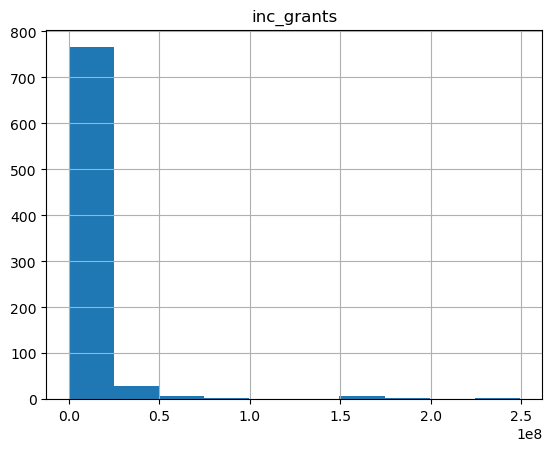

In [27]:
hist = acro.hist(df, "inc_grants")
print(hist)

### ACRO Histogram with suppression

In [28]:
acro.suppress = True
hist = acro.hist(df, "inc_grants")

INFO:acro:status: fail
INFO:acro:records:add(): output_18


<Figure size 640x480 with 0 Axes>

In [29]:
acro.suppress = False

### List current ACRO outputs

In [30]:
results_str = acro.print_outputs()

uid: output_0
status: fail
type: table
properties: {'method': 'crosstab'}
sdc: {'summary': {'suppressed': False, 'negative': 0, 'missing': 0, 'threshold': 12, 'p-ratio': 0, 'nk-rule': 0, 'all-values-are-same': 0}, 'cells': {'negative': [], 'missing': [], 'threshold': [[0, 0], [0, 5], [1, 0], [1, 5], [2, 0], [2, 5], [3, 0], [3, 5], [4, 0], [4, 5], [5, 0], [5, 5]], 'p-ratio': [], 'nk-rule': [], 'all-values-are-same': []}}
command: safe_table = acro.crosstab(df.year, [df.survivor, df.grant_type])
summary: fail; threshold: 12 cells may need suppressing; 
outcome: survivor   Dead_in_2015     Alive_in_2015                     
grant_type            G   R             G   N   R          R/G
year                                                          
2010        threshold;   ok            ok  ok  ok  threshold; 
2011        threshold;   ok            ok  ok  ok  threshold; 
2012        threshold;   ok            ok  ok  ok  threshold; 
2013        threshold;   ok            ok  ok  ok  thres

### Remove some ACRO outputs before finalising

In [31]:
acro.remove_output("output_1")
acro.remove_output("output_4")

INFO:acro:records:remove(): output_1 removed
INFO:acro:records:remove(): output_4 removed


### Rename ACRO outputs before finalising

In [32]:
acro.rename_output("output_2", "pivot_table")

INFO:acro:records:rename_output(): output_2 renamed to pivot_table


### Add a comment to output

In [33]:
acro.add_comments("output_0", "This is a cross table between year and grant_type")
acro.add_comments("output_0", "6 cells were suppressed in this table")

INFO:acro:records:a comment was added to output_0
INFO:acro:records:a comment was added to output_0


### Add an unsupported output to the list of outputs

In [34]:
acro.custom_output(
    "XandY.jpeg", "This output is an image showing the relationship between X and Y"
)

INFO:acro:records:add_custom(): output_19


### Request an exception for some of the outputs

In [35]:
acro.add_exception("output_0", "I really need this.")
acro.add_exception("output_3", "This one is safe. Trust me, I'm a professor.")
acro.add_exception("output_5", "It's not disclosive, I promise.")
acro.add_exception("output_6", "I need this one too")

INFO:acro:records:exception request was added to output_0
INFO:acro:records:exception request was added to output_3
INFO:acro:records:exception request was added to output_5
INFO:acro:records:exception request was added to output_6


### Finalise ACRO

In [39]:
SAVE_PATH = "ACRO_RES"

# output = acro.finalise(SAVE_PATH, "xlsx")
output = acro.finalise(SAVE_PATH, "json")

INFO:acro:records:
uid: output_7
status: fail
type: table
properties: {'method': 'crosstab'}
sdc: {'summary': {'suppressed': False, 'negative': 0, 'missing': 0, 'threshold': 7, 'p-ratio': 2, 'nk-rule': 1, 'all-values-are-same': 0}, 'cells': {'negative': [], 'missing': [], 'threshold': [[0, 1], [0, 3], [1, 3], [2, 3], [3, 3], [4, 3], [5, 3]], 'p-ratio': [[0, 1], [0, 3]], 'nk-rule': [[0, 3]], 'all-values-are-same': []}}
command: safe_table = acro.crosstab(
summary: fail; threshold: 7 cells may need suppressing; p-ratio: 2 cells may need suppressing; nk-rule: 1 cells may need suppressing; 
outcome: grant_type   G                     N   R                            R/G All
year                                                                       
2010        ok  threshold; p-ratio;   ok  threshold; p-ratio; nk-rule;   ok
2011        ok                    ok  ok                    threshold;   ok
2012        ok                    ok  ok                    threshold;   ok
2013        ok   

 a reason should be provided


INFO:acro:records:
uid: output_8
status: review
type: table
properties: {'method': 'crosstab'}
sdc: {'summary': {'suppressed': False, 'negative': 10, 'missing': 0, 'threshold': 7, 'p-ratio': 2, 'nk-rule': 1, 'all-values-are-same': 0}, 'cells': {'negative': [[0, 2], [1, 1], [1, 2], [2, 2], [3, 1], [3, 2], [4, 1], [4, 2], [5, 1], [5, 2]], 'missing': [], 'threshold': [[0, 1], [0, 3], [1, 3], [2, 3], [3, 3], [4, 3], [5, 3]], 'p-ratio': [[0, 1], [0, 3]], 'nk-rule': [[0, 3]], 'all-values-are-same': []}}
command: safe_table = acro.crosstab(df.year, df.grant_type, values=negative, aggfunc="mean")
summary: review; negative values found
outcome: grant_type G         N         R R/G
year                                
2010                    negative    
2011          negative  negative    
2012                    negative    
2013          negative  negative    
2014          negative  negative    
2015          negative  negative    
output: [grant_type           G              N           R  

 negative values are valid financial losses


INFO:acro:records:
uid: output_9
status: fail
type: table
properties: {'method': 'pivot_table'}
sdc: {'summary': {'suppressed': False, 'negative': 0, 'missing': 0, 'threshold': 7, 'p-ratio': 2, 'nk-rule': 1, 'all-values-are-same': 0}, 'cells': {'negative': [], 'missing': [], 'threshold': [[1, 0], [3, 0], [3, 1], [3, 2], [3, 3], [3, 4], [3, 5]], 'p-ratio': [[1, 0], [3, 0]], 'nk-rule': [[3, 0]], 'all-values-are-same': []}}
command: table = acro.pivot_table(
summary: fail; threshold: 7 cells may need suppressing; p-ratio: 2 cells may need suppressing; nk-rule: 1 cells may need suppressing; 
outcome:                                inc_grants                            \
year                                 2010         2011         2012   
grant_type                                                            
G                                      ok           ok           ok   
N                    threshold; p-ratio;            ok           ok   
R                                      ok

 a reason should be provided


INFO:acro:records:
uid: output_12
status: review
type: table
properties: {'method': 'pivot_table'}
sdc: {'summary': {'suppressed': False, 'negative': 4, 'missing': 0, 'threshold': 0, 'p-ratio': 0, 'nk-rule': 0, 'all-values-are-same': 0}, 'cells': {'negative': [[1, 0], [1, 1], [2, 0], [2, 1]], 'missing': [], 'threshold': [], 'p-ratio': [], 'nk-rule': [], 'all-values-are-same': []}}
command: table = acro.pivot_table(
summary: review; negative values found
outcome:                  mean        std
           inc_grants inc_grants
grant_type                      
G                               
N            negative   negative
R            negative   negative
R/G                             
output: [                    mean           std
              inc_grants    inc_grants
grant_type                            
G           1.141279e+07  2.283220e+07
N           1.341800e+05  1.990196e+05
R           7.882230e+06  3.204558e+07
R/G         1.664827e+07  1.583532e+07]
timestamp: 2025-03-

 negative values are valid financial losses


INFO:acro:records:
uid: output_17
status: fail
type: histogram
properties: {'method': 'histogram'}
sdc: {}
command: hist = acro.hist(df, "inc_grants")
summary: Please check the minimum and the maximum values. The minimum value of the inc_grants column is: -10.0. The maximum value of the inc_grants column is: 249327008.0
outcome: Empty DataFrame
Columns: []
Index: []
output: ['acro_artifacts/histogram_0.png']
timestamp: 2025-03-06T19:43:35.149884
comments: []
exception: 

The status of the record above is: fail.
Please explain why an exception should be granted.



 to be fair this is probably disclosive ...


INFO:acro:records:
uid: output_18
status: fail
type: histogram
properties: {'method': 'histogram'}
sdc: {}
command: hist = acro.hist(df, "inc_grants")
summary: Please check the minimum and the maximum values. The minimum value of the inc_grants column is: -10.0. The maximum value of the inc_grants column is: 249327008.0
outcome: Empty DataFrame
Columns: []
Index: []
output: ['acro_artifacts/histogram_1.png']
timestamp: 2025-03-06T19:43:35.204307
comments: []
exception: 

The status of the record above is: fail.
Please explain why an exception should be granted.



 to be fair this is probably disclosive ...


INFO:acro:records:
uid: pivot_table
status: fail
type: table
properties: {'method': 'crosstab'}
sdc: {'summary': {'suppressed': False, 'negative': 0, 'missing': 0, 'threshold': 4, 'p-ratio': 0, 'nk-rule': 0, 'all-values-are-same': 0}, 'cells': {'negative': [], 'missing': [], 'threshold': [[0, 0], [0, 1], [1, 0], [1, 1]], 'p-ratio': [], 'nk-rule': [], 'all-values-are-same': []}}
command: acro.crosstab(mydata.year, mydata.survivor)
summary: fail; threshold: 4 cells may need suppressing; 
outcome: survivor Dead_in_2015 Alive_in_2015
year                               
2010      threshold;    threshold; 
2011      threshold;    threshold; 
output: [survivor  Dead in 2015  Alive in 2015
year                                 
2010                 2              2
2011                 2              2]
timestamp: 2025-03-06T19:43:34.423743
comments: []
exception: 

The status of the record above is: fail.
Please explain why an exception should be granted.



 to be fair this is probably disclosive ...


INFO:acro:records:
uid: output_19
status: review
type: custom
properties: {}
sdc: {}
command: custom
summary: review
outcome: Empty DataFrame
Columns: []
Index: []
output: ['XandY.jpeg']
timestamp: 2025-03-06T19:43:35.258648
comments: ['This output is an image showing the relationship between X and Y']
exception: 

The status of the record above is: review.
Please explain why an exception should be granted.



 please review- this image is not disclosive


INFO:acro:records:outputs written to: ACRO_RES


### List files generated

In [40]:
files = []
for name in os.listdir(SAVE_PATH):
    if os.path.isfile(os.path.join(SAVE_PATH, name)):
        files.append(name)
files.sort()
for f in files:
    print(f)

XandY.jpeg
config.json
histogram_0.png
histogram_1.png
output_0_0.csv
output_10_0.csv
output_11_0.csv
output_12_0.csv
output_13_0.csv
output_13_1.csv
output_13_2.csv
output_14_0.csv
output_14_1.csv
output_14_2.csv
output_15_0.csv
output_15_1.csv
output_16_0.csv
output_16_1.csv
output_3_0.csv
output_5_0.csv
output_6_0.csv
output_7_0.csv
output_8_0.csv
output_9_0.csv
pivot_table_0.csv
results.json


### Checksums

In [38]:
files = []
checksum_dir = os.path.join(SAVE_PATH, "checksums")
for name in os.listdir(checksum_dir):
    if os.path.isfile(os.path.join(checksum_dir, name)):
        files.append(name)
files.sort()
for f in files:
    print(f)

XandY.jpeg.txt
histogram_0.png.txt
histogram_1.png.txt
output_0_0.csv.txt
output_10_0.csv.txt
output_11_0.csv.txt
output_12_0.csv.txt
output_13_0.csv.txt
output_13_1.csv.txt
output_13_2.csv.txt
output_14_0.csv.txt
output_14_1.csv.txt
output_14_2.csv.txt
output_15_0.csv.txt
output_15_1.csv.txt
output_16_0.csv.txt
output_16_1.csv.txt
output_3_0.csv.txt
output_5_0.csv.txt
output_6_0.csv.txt
output_7_0.csv.txt
output_8_0.csv.txt
output_9_0.csv.txt
pivot_table_0.csv.txt
results.json.txt
